## ARC 380 / CEE 380 / ROB 380 – Introduction to Robotics for Digital Fabrication
## Workshop: NumPy and Linear Algebra Operations
Princeton University, Spring 2026

Professor: Arash Adel | TA: Daniel Ruan

---


# Goals

By the end of this workshop, you should be able to:

- Create and manipulate **NumPy arrays** (shape, dtype, indexing, slicing, reshaping)
- Perform **core linear algebra operations** used in robotics:
  - dot products, matrix–vector and matrix–matrix multiplication
  - norms and unit vectors
  - cross products
  - building and applying **rotation matrices** (2D + 3D)
  - applying translational and rotational transformations

> Next session: we will extend these ideas to **homogeneous transformations**.


## Setup

Before we begin, we need to import the required libraries:

- **NumPy** (`np`): The fundamental package for numerical computing in Python. It provides efficient array operations and linear algebra functions that are essential for robotics computations.
- **Matplotlib** (`plt`): A plotting library we'll use to visualize vectors, points, and transformations. Visualization helps build geometric intuition for the math.

We also configure NumPy's print options to display floating-point numbers with 4 decimal places and suppress scientific notation for cleaner output.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.set_printoptions(precision=4, suppress=True)

## Visualization Helper Functions

The following utility functions will help us visualize 2D and 3D vectors, points, and transformations throughout this workshop. Being able to *see* how vectors rotate and translate builds essential geometric intuition for robotics.

- `plot_vectors_2d()`: Draws 2D vectors as arrows from the origin, useful for understanding rotation matrices
- `plot_vectors_3d()`: Draws 3D vectors as arrows, essential for visualizing robot orientations
- `plot_points_3d()`: Plots 3D points with optional connections, helpful for seeing how transformations affect geometry

In [74]:
def plot_vectors_2d(vectors, labels=None, colors=None, title="2D Vectors", ax=None):
    """
    Plot 2D vectors as arrows originating from the origin.
    
    Parameters:
    -----------
    vectors : list of array-like
        List of 2D vectors to plot, each with shape (2,)
    labels : list of str, optional
        Labels for each vector
    colors : list of str, optional
        Colors for each vector (default: cycles through standard colors)
    title : str
        Plot title
    ax : matplotlib axis, optional
        Existing axis to plot on (creates new figure if None)
    
    Returns:
    --------
    ax : matplotlib axis
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))
    
    default_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    if colors is None:
        colors = default_colors
    
    # Find plot limits based on vectors
    all_coords = np.array(vectors)
    max_val = np.max(np.abs(all_coords)) * 1.3
    
    for i, v in enumerate(vectors):
        color = colors[i % len(colors)]
        ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, 
                  color=color, width=0.02)
        if labels:
            ax.annotate(labels[i], xy=(v[0], v[1]), fontsize=12, 
                       xytext=(5, 5), textcoords='offset points')
    
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)
    ax.set_aspect('equal')
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(title)
    
    return ax


def plot_vectors_3d(vectors, labels=None, colors=None, title="3D Vectors", ax=None):
    """
    Plot 3D vectors as arrows originating from the origin.
    
    Parameters:
    -----------
    vectors : list of array-like
        List of 3D vectors to plot, each with shape (3,)
    labels : list of str, optional
        Labels for each vector
    colors : list of str, optional
        Colors for each vector
    title : str
        Plot title
    ax : matplotlib 3D axis, optional
        Existing 3D axis to plot on
    
    Returns:
    --------
    ax : matplotlib 3D axis
    """
    if ax is None:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')
    
    default_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    if colors is None:
        colors = default_colors
    
    for i, v in enumerate(vectors):
        color = colors[i % len(colors)]
        ax.quiver(0, 0, 0, v[0], v[1], v[2], color=color, arrow_length_ratio=0.1, linewidth=2)
        if labels:
            ax.text(v[0], v[1], v[2], f'  {labels[i]}', fontsize=10)
    
    # Set equal aspect ratio
    all_coords = np.array(vectors)
    max_val = np.max(np.abs(all_coords)) * 1.2
    ax.set_xlim([-max_val, max_val])
    ax.set_ylim([-max_val, max_val])
    ax.set_zlim([-max_val, max_val])
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    
    return ax


def plot_points_3d(points, labels=None, colors=None, connect=False, title="3D Points", ax=None):
    """
    Plot 3D points with optional labels and connections.
    
    Parameters:
    -----------
    points : array-like
        Array of 3D points with shape (N, 3)
    labels : list of str, optional
        Labels for each point
    colors : str or list, optional
        Color(s) for points
    connect : bool
        If True, connect points with lines
    title : str
        Plot title
    ax : matplotlib 3D axis, optional
        Existing 3D axis to plot on
    
    Returns:
    --------
    ax : matplotlib 3D axis
    """
    if ax is None:
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')
    
    points = np.array(points)
    
    if colors is None:
        colors = '#1f77b4'
    
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, s=50)
    
    if labels:
        for i, (point, label) in enumerate(zip(points, labels)):
            ax.text(point[0], point[1], point[2], f'  {label}', fontsize=10)
    
    if connect and len(points) > 1:
        ax.plot(points[:, 0], points[:, 1], points[:, 2], 'k-', alpha=0.5)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    
    return ax

# 1 NumPy Arrays (ndarray)

NumPy's core data structure is the **`ndarray`** (N-dimensional array). In robotics, we use arrays to represent:
- **Vectors**: positions, velocities, forces (1D arrays)
- **Matrices**: rotation matrices, transformation matrices (2D arrays)
- **Point clouds**: collections of 3D points (2D arrays with shape `(N, 3)`)
- And more!

### Why NumPy instead of Python lists?

| Feature | Python List | NumPy ndarray |
|---------|-------------|---------------|
| Element types | Mixed (any objects) | Fixed (single `dtype`) |
| Memory layout | Scattered pointers | Contiguous block |
| Math operations | Loop required | Vectorized (fast!) |
| Broadcasting | Not supported | Automatic |

NumPy arrays are **10-100x faster** for numerical operations because they avoid Python's per-element overhead and leverage optimized C/Fortran libraries.

## 1.1 Creating Arrays

There are many ways to create NumPy arrays. The most common methods are:

| Function | Purpose | Example |
|----------|---------|---------|
| `np.array([...])` | Convert Python list/tuple to array | `np.array([1, 2, 3])` |
| `np.zeros(shape)` | Array filled with zeros | `np.zeros((3, 3))` |
| `np.ones(shape)` | Array filled with ones | `np.ones((2, 4))` |
| `np.eye(n)` | Identity matrix (1s on diagonal) | `np.eye(3)` |
| `np.arange(start, stop, step)` | Evenly spaced values (like `range`) | `np.arange(0, 10, 2)` |
| `np.linspace(start, stop, num)` | `num` evenly spaced values | `np.linspace(0, 1, 5)` |

In [75]:
a = np.array([1, 2, 3])
A = np.array([[1, 2, 3], [4, 5, 6]])
print("a =\n", a)
print("A =\n", A)

a =
 [1 2 3]
A =
 [[1 2 3]
 [4 5 6]]


In [76]:
z = np.zeros((2, 3))
o = np.ones((2, 3))
I = np.eye(3)
r = np.arange(0, 10, 2)
x = np.linspace(0, 1, 5)
print("z =\n", z)
print("o =\n", o)
print("I =\n", I)
print("r =\n", r)
print("x =\n", x)

z =
 [[0. 0. 0.]
 [0. 0. 0.]]
o =
 [[1. 1. 1.]
 [1. 1. 1.]]
I =
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
r =
 [0 2 4 6 8]
x =
 [0.   0.25 0.5  0.75 1.  ]


## 1.2 Shape, dimensions, and dtype

NumPy arrays explicitly store their dimensional structure. Understanding an array’s shape and size is essential for verifying that vector and matrix operations are well-defined (especially for multiplication, reshaping, and transformations).

In the code cell below we inspect:

- `A.shape`: the length of each dimension. For a matrix this is `(rows, cols)`.
- `A.ndim`: the number of dimensions (rank) of the array (1D vector vs 2D matrix vs higher-order tensor).
- `A.size`: the total number of elements, equal to the product of the entries in `shape`.
- `A.dtype`: the data type used to store elements (controls precision + numeric behavior).

These quick checks are a good habit before doing linear algebra operations.


In [77]:
A = np.array([[1, 2, 3], [4, 5, 6]])

print("A.shape =", A.shape)
print("A.ndim =", A.ndim)
print("A.size =", A.size)
print("A.dtype =", A.dtype)

A.shape = (2, 3)
A.ndim = 2
A.size = 6
A.dtype = int64


In [78]:
b = np.array([1, 2, 3], dtype=np.float64)
c = np.array([1, 2, 3], dtype=np.int32)
print("b.dtype =", b.dtype)
print("c.dtype =", c.dtype)

b.dtype = float64
c.dtype = int32


## 1.3 Casting and copying

- `astype(...)` creates a **new** array with a different dtype
- `copy()` forces a deep copy (useful to avoid view-related surprises)


In [79]:
d = np.array([1, 2, 3], dtype=np.int32)
e = d.astype(np.float64)
f = d.copy()

print("d = \n", d)
print("e = \n", e)
print("f = \n", f)

d = 
 [1 2 3]
e = 
 [1. 2. 3.]
f = 
 [1 2 3]


# 1.4 Basic NumPy operators

NumPy overloads standard arithmetic operators to work **elementwise** on arrays. This lets you write math expressions that look like the underlying linear algebra, without Python loops.

- `+` / `-`: elementwise addition / subtraction  
- `*` / `/`: elementwise multiplication / division  
- `**`: elementwise exponentiation  

Elementwise operations require compatible shapes (or broadcasting, see Section 4 below).  

**Important:** `*` is *not* matrix multiplication. Use `@` for matrix multiplication and applying linear transforms (see Section 5.3 below).


In [80]:
v = np.array([1.0, 2.0, 3.0])
w = np.array([-1.0, 0.5, 4.0])

print("v =", v)
print("w =", w)

v = [1. 2. 3.]
w = [-1.   0.5  4. ]


In [81]:
add_result = v + w
sub_result = v - w

print("v + w =", add_result)
print("v - w =", sub_result)

v + w = [0.  2.5 7. ]
v - w = [ 2.   1.5 -1. ]


In [82]:
scalar_mult_result = 2 * v
elementwise_mult_result = v * w

print("2 * v =", scalar_mult_result)
print("v * w =", elementwise_mult_result)

2 * v = [2. 4. 6.]
v * w = [-1.  1. 12.]


In [83]:
scalar_div_result = v / 2
elementwise_div_result = v / w

print("v / 2 =", scalar_div_result)
print("v / w =", elementwise_div_result)

v / 2 = [0.5 1.  1.5]
v / w = [-1.    4.    0.75]


In [84]:
exp_result = v**2

print("v**2 =", exp_result)

v**2 = [1. 4. 9.]


# 2 Indexing, Slicing, and Views

Accessing specific elements or subsets of an array is fundamental. NumPy uses **zero-based indexing** (first element is at index 0).

### Key Concepts

- **Indexing**: Access a single element with `A[row, col]`
- **Slicing**: Extract a range with `A[start:stop]` (stop is exclusive)
- **Views vs Copies**: Slicing returns a **view** (a reference to the original data), not a copy. Changes to a view affect the original array!

### Common Slicing Patterns

| Syntax | Meaning |
|--------|---------|
| `A[i, j]` | Single element at row `i`, column `j` |
| `A[i, :]` or `A[i]` | Entire row `i` |
| `A[:, j]` | Entire column `j` |
| `A[i:j, :]` | Rows from `i` to `j-1` |
| `A[:, i:j]` | Columns from `i` to `j-1` |

In [85]:
A = np.arange(1, 13).reshape(3, 4)
print("A =\n", A)


A =
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [86]:
# Access individual elements
print("A[0, 0] =", A[0, 0])
print("A[2, 3] =", A[2, 3])

# Access an entire row
print("A[1, :] =", A[1, :])
print("A[0] =", A[0])

# Access an entire column
print("A[:, 2] =", A[:, 2])
print("A[:, 3] =", A[:, 3])


A[0, 0] = 1
A[2, 3] = 12
A[1, :] = [5 6 7 8]
A[0] = [1 2 3 4]
A[:, 2] = [ 3  7 11]
A[:, 3] = [ 4  8 12]


In [87]:
# Combined slicing
print("A[1, 1:3] =", A[1, 1:3])
print("A[0:2, 2] =", A[0:2, 2])

A[1, 1:3] = [6 7]
A[0:2, 2] = [3 7]


In [88]:
B_view = A[:, :2]
B_view[0, 0] = -999
print("A =\n", A)   # A is modified because B_view is a view


A =
 [[-999    2    3    4]
 [   5    6    7    8]
 [   9   10   11   12]]


In [89]:
A = np.arange(1, 13).reshape(3, 4)
B_copy = A[:, :2].copy()
B_copy[0, 0] = -999
print("A = \n", A)   # A is not modified because B_copy is a copy
print("B_copy = \n", B_copy)

A = 
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
B_copy = 
 [[-999    2]
 [   5    6]
 [   9   10]]


# 3 Reshaping and Stacking

In robotics, we often need to switch between different array shapes (non-exhaustive):

| Shape | Interpretation | Example Use |
|-------|----------------|-------------|
| `(3,)` | 1D vector | A single point or direction |
| `(3, 1)` | Column vector | For matrix multiplication compatibility |
| `(1, 3)` | Row vector | For certain broadcasting operations |
| `(N, 3)` | N points (each row is a point) | Point clouds, trajectories |

### Key Functions

- **`reshape(new_shape)`**: Change the shape without changing data (must have same total elements)
- **`np.vstack([a, b, ...])`**: Stack arrays vertically (add rows)
- **`np.hstack([a, b, ...])`**: Stack arrays horizontally (add columns)
- **`flatten()` / `ravel()`**: Convert any array to 1D

In [90]:
p = np.array([1.0, 2.0, 3.0])
print("p =\n", p)
print("p.shape =", p.shape)

p =
 [1. 2. 3.]
p.shape = (3,)


In [91]:
# Reshaping vectors
p_col = p.reshape(3, 1)
p_row = p.reshape(1, 3)

print("p_col =\n", p_col)
print("p_col.shape =", p_col.shape)
print("p_row =\n", p_row)
print("p_row.shape =", p_row.shape)

p_col =
 [[1.]
 [2.]
 [3.]]
p_col.shape = (3, 1)
p_row =
 [[1. 2. 3.]]
p_row.shape = (1, 3)


In [92]:
# Stacking vectors to form matrices
p1 = np.array([0.0, 0.0, 0.0])
p2 = np.array([1.0, 0.0, 0.0])
p3 = np.array([1.0, 1.0, 0.0])
P = np.vstack([p1, p2, p3])

print("P =\n", P)

P =
 [[0. 0. 0.]
 [1. 0. 0.]
 [1. 1. 0.]]


In [93]:
# Adding a column of ones to a matrix
Q = np.hstack([P, np.ones((P.shape[0], 1))])

print("Q =\n", Q)

Q =
 [[0. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 1. 0. 1.]]


# 4 Vector Operations

In robotics, we constantly work with vectors to represent positions, directions, velocities, and forces. This section covers the essential vector operations you'll use repeatedly:

| Operation | NumPy Function | Robotics Application |
|-----------|----------------|----------------------|
| **Dot product** | `np.dot(a, b)` or `a @ b` | Projecting forces, checking orthogonality |
| **Norm (magnitude)** | `np.linalg.norm(v)` | Distance calculations, normalizing directions |
| **Unit vector** | `v / np.linalg.norm(v)` | Direction vectors, rotation axes |
| **Cross product** | `np.cross(a, b)` | Torque calculations, finding perpendicular axes |
| **Angle between vectors** | `np.arccos(a·b / (‖a‖‖b‖))` | Joint angles, orientation errors |

Understanding these operations is crucial because they form the building blocks for transformations and robot kinematics.

## 4.1 Dot Product, Norms, and Unit Vectors

### Dot Product
The **dot product** (or inner product) of two vectors $\mathbf{u}$ and $\mathbf{v}$ is:

$$\mathbf{u} \cdot \mathbf{v} = u_1 v_1 + u_2 v_2 + u_3 v_3 = \|\mathbf{u}\| \|\mathbf{v}\| \cos(\theta)$$

The dot product tells us:
- **Magnitude of projection**: How much one vector points in the direction of another
- **Orthogonality check**: If $\mathbf{u} \cdot \mathbf{v} = 0$, the vectors are perpendicular

### Norm (Magnitude)
The **Euclidean norm** gives the length of a vector:

$$\|\mathbf{u}\| = \sqrt{u_1^2 + u_2^2 + u_3^2}$$

### Unit Vector
A **unit vector** has magnitude 1 and represents pure direction. To normalize any vector:

$$\hat{\mathbf{u}} = \frac{\mathbf{u}}{\|\mathbf{u}\|}$$

In [94]:
u = np.array([1.0, 2.0, 3.0])
v = np.array([-1.0, 4.0, 0.5])

# Dot product
dot_uv = np.dot(u, v)
print("Dot product u . v =", dot_uv)


Dot product u . v = 8.5


In [95]:
# Vector norm (magnitude)
norm_u = np.linalg.norm(u)
print ("Norm of u =", norm_u)

Norm of u = 3.7416573867739413


In [96]:
# Normalize vector u
u_hat = u / norm_u
print("Normalized vector u_hat =", u_hat)

Normalized vector u_hat = [0.2673 0.5345 0.8018]


### Cosine Similarity and the Angle Between Vectors

**Cosine similarity** measures how similar two vectors are based on the *angle* between them, rather than their length. For two vectors \(u\) and \(v\), it is defined as

$$
\cos(\theta) = \frac{u \cdot v}{\|u\| \, \|v\|}
$$

This is the dot product normalized by the magnitudes of the vectors, so the result depends only on direction:
- $\cos(\theta) = 1$ → same direction  
- $\cos(\theta) = 0$ → orthogonal (perpendicular)  
- $\cos(\theta) = -1$ → opposite directions  

Once we have $\cos(\theta)$, we can recover the angle $\theta$ using the inverse cosine (`arccos`).

#### Why do we clip `cos_theta`?
Mathematically, cosine similarity is guaranteed to lie in the interval $[-1, 1]$. However, due to **floating-point rounding errors**, numerical computation can sometimes produce values like `1.0000000002` or `-1.0000000001`.  

The `np.arccos` function is only defined on $[-1, 1]$, so we use `np.clip` to safely constrain the value to this range and avoid invalid results (`NaN`) caused by numerical precision issues.


In [97]:
# Cosine similarity
cos_theta = np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))
clipped_cos_theta = np.clip(cos_theta, -1.0, 1.0)
theta = np.arccos(clipped_cos_theta)
print("cos_theta =", cos_theta)
print("theta (radians) =", theta)

cos_theta = 0.5469660342746189
theta (radians) = 0.9920605372954449


## 4.2 Cross Product (3D Only)

The **cross product** of two 3D vectors produces a third vector that is **perpendicular to both**:

$$\mathbf{a} \times \mathbf{b} = \begin{bmatrix} a_2 b_3 - a_3 b_2 \\ a_3 b_1 - a_1 b_3 \\ a_1 b_2 - a_2 b_1 \end{bmatrix}$$

### Key Properties
- **Direction**: Follows the right-hand rule (curl fingers from $\mathbf{a}$ to $\mathbf{b}$, thumb points in direction of $\mathbf{a} \times \mathbf{b}$)
- **Magnitude**: $\|\mathbf{a} \times \mathbf{b}\| = \|\mathbf{a}\| \|\mathbf{b}\| \sin(\theta)$
- **Anti-commutative**: $\mathbf{a} \times \mathbf{b} = -(\mathbf{b} \times \mathbf{a})$

### Robotics Applications
- **Torque**: $\boldsymbol{\tau} = \mathbf{r} \times \mathbf{F}$ (moment arm × force)
- **Angular velocity**: Converting between representations
- **Building coordinate frames**: Given two axes, find the third perpendicular axis

In [98]:
a = np.array([1.0, 0.0, 0.0])
b = np.array([0.0, 1.0, 0.0])
cross_product = np.cross(a, b)
print("Cross product a x b =", cross_product)


Cross product a x b = [0. 0. 1.]


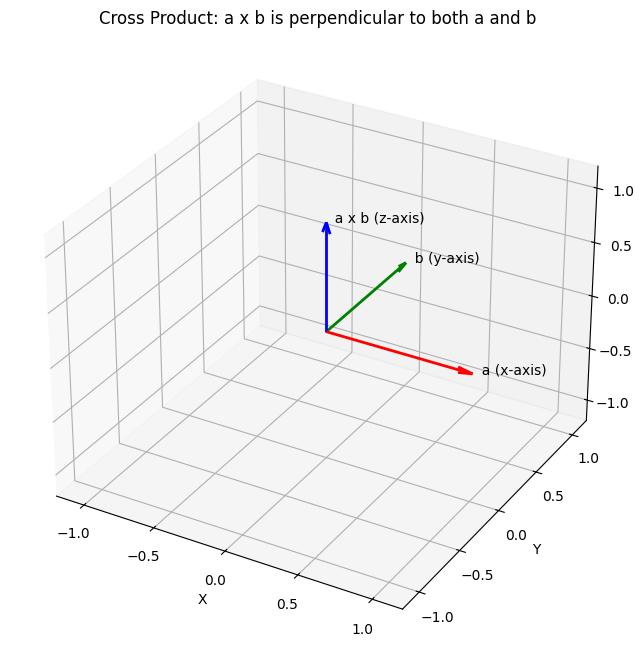

In [99]:
# Visualize the cross product - the result is perpendicular to both input vectors
plot_vectors_3d(
    [a, b, cross_product], 
    labels=['a (x-axis)', 'b (y-axis)', 'a x b (z-axis)'],
    colors=['red', 'green', 'blue'],
    title="Cross Product: a x b is perpendicular to both a and b"
)
plt.show()

## 4.3 Matrix Multiplication (`@` operator)

Matrix multiplication is the foundation of linear transformations in robotics. Use the `@` operator (not `*`, which is elementwise!).

### Common Patterns in Robotics

| Expression | Interpretation | Result Shape |
|------------|----------------|--------------|
| `R @ p` | Rotate vector `p` by rotation matrix `R` | `(3,)` |
| `R @ P.T` | Rotate multiple points (columns of `P.T`) | `(3, N)` |
| `R2 @ R1` | Compose rotations: first `R1`, then `R2` | `(3, 3)` |
| `A @ B @ C` | Chain of transformations (right to left) | Depends on shapes |

### Shape Compatibility
For `A @ B` to work, the inner dimensions must match:
- `A` has shape `(m, n)`
- `B` has shape `(n, p)`
- Result has shape `(m, p)`

**Important**: In NumPy, a 1D array of shape `(3,)` is automatically treated as a column vector when multiplied on the right of a matrix.

In [100]:
R = np.array([[0.0, -1.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0]])
p = np.array([1.0, 0.0, 0.0])
print("R @ p =", R @ p)


R @ p = [0. 1. 0.]


You can also space out the array constructor over several lines for easier visualization.

In [101]:
R = np.array([
        [0.0, -1.0, 0.0],
        [1.0, 0.0, 0.0],
        [0.0, 0.0, 1.0]
    ])
print("R =\n", R)

R =
 [[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]


# 5 Rotation Matrices (2D and 3D)

A **rotation matrix** describes how to rotate points or vectors around an axis. Rotation matrices have special properties:

### Properties of Valid Rotation Matrices
1. **Orthonormal**: $R^T R = R R^T = I$ (columns/rows are unit vectors and mutually perpendicular)
2. **Determinant = +1**: $\det(R) = 1$ (preserves orientation, no reflection)
3. **Inverse = Transpose**: $R^{-1} = R^T$ (makes inverting rotations cheap!)

### 2D Rotation Matrix
Rotates a point counterclockwise by angle $\theta$ around the origin:

$$R_{2D}(\theta) = \begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix}$$

### 3D Elementary Rotation Matrices
Rotations around each principal axis (right-hand rule: positive angle = counterclockwise when looking down the axis):

$$R_x(\theta) = \begin{bmatrix} 1 & 0 & 0 \\ 0 & \cos\theta & -\sin\theta \\ 0 & \sin\theta & \cos\theta \end{bmatrix}, \quad
R_y(\theta) = \begin{bmatrix} \cos\theta & 0 & \sin\theta \\ 0 & 1 & 0 \\ -\sin\theta & 0 & \cos\theta \end{bmatrix}, \quad
R_z(\theta) = \begin{bmatrix} \cos\theta & -\sin\theta & 0 \\ \sin\theta & \cos\theta & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

In [102]:
def rot2(theta):
    """2D rotation matrix."""
    c = np.cos(theta)
    s = np.sin(theta)
    return np.array([[c, -s], [s, c]])

theta = np.deg2rad(30)
R2 = rot2(theta)

print("R2 =\n", R2)


R2 =
 [[ 0.866 -0.5  ]
 [ 0.5    0.866]]


### Verifying Rotation Matrix Properties

Always verify your rotation matrices! We check two properties:
1. **Orthonormality**: `R.T @ R` should equal the identity matrix `I`.
2. **Determinant**: `np.linalg.det(R)` should equal `+1`.
3. **Inverse = Transpose**: `np.linalg.inv(R)` should equal `R.T`.

If these checks fail, you may have a bug in your rotation matrix construction.

In [103]:
# Verify orthogonality and determinant
print("R2.T @ R2 =\n", R2.T @ R2)
print("Determinant of R2 =", np.linalg.det(R2))
print("Inverse equals Transpose =", np.allclose(np.linalg.inv(R2), R2.T))

R2.T @ R2 =
 [[1. 0.]
 [0. 1.]]
Determinant of R2 = 1.0
Inverse equals Transpose = True


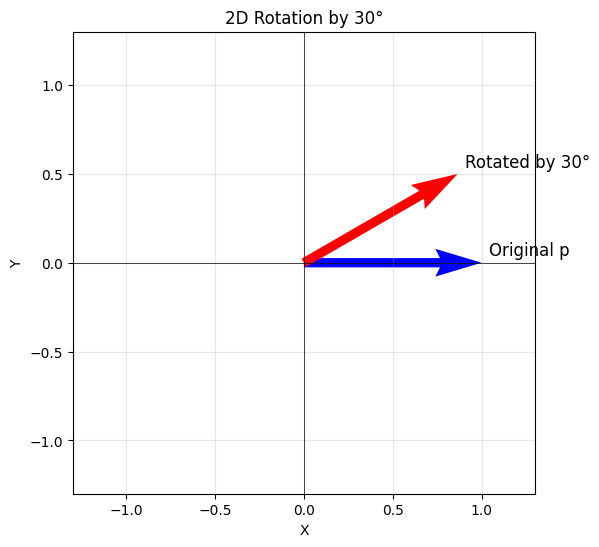

In [104]:
# Visualize 2D rotation: rotate a unit vector along x-axis by 30 degrees
p_original = np.array([1.0, 0.0])
p_rotated = R2 @ p_original

plot_vectors_2d(
    [p_original, p_rotated],
    labels=['Original p', f'Rotated by {np.rad2deg(theta):.0f}°'],
    colors=['blue', 'red'],
    title=f"2D Rotation by {np.rad2deg(theta):.0f}°"
)
plt.show()

**Exercise**: Fill in the following helper functions to construct a 3D rotation around a specified axis.

In [105]:
def rotx(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    return np.array([[1, 0, 0], [0, c, -s], [0, s, c]])

def roty(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    return np.array([[c, 0, s], [0, 1, 0], [-s, 0, c]])

def rotz(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    return np.array([[c, -s, 0], [s, c, 0], [0, 0, 1]])


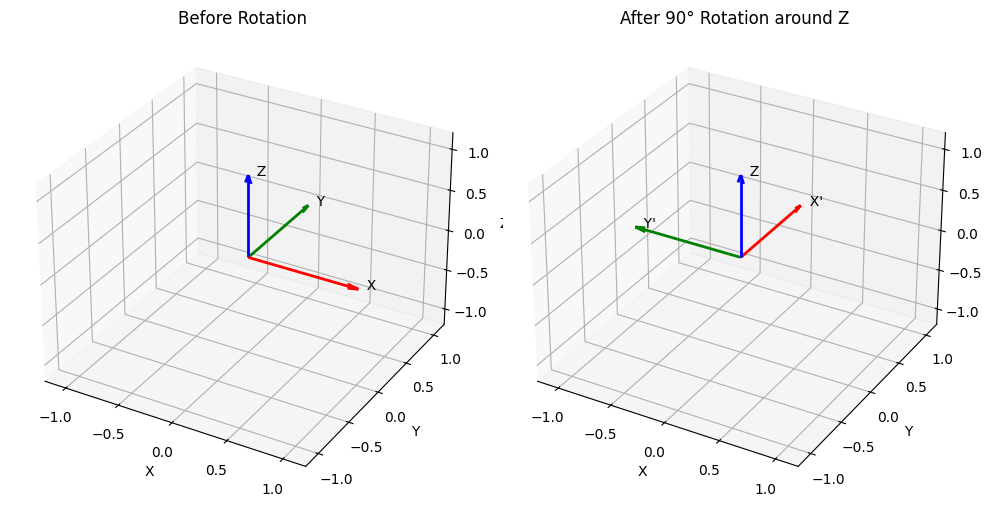

In [106]:
# Visualize 3D rotation around Z-axis by 90 degrees
# The standard basis vectors (x, y, z axes) transform under Rz
Rz = rotz(np.deg2rad(90))

x_axis = np.array([1, 0, 0])
y_axis = np.array([0, 1, 0])
z_axis = np.array([0, 0, 1])

x_rotated = Rz @ x_axis
y_rotated = Rz @ y_axis

fig = plt.figure(figsize=(10, 5))

# Before rotation
ax1 = fig.add_subplot(121, projection='3d')
plot_vectors_3d([x_axis, y_axis, z_axis], 
                labels=['X', 'Y', 'Z'], 
                colors=['red', 'green', 'blue'],
                title="Before Rotation", ax=ax1)

# After rotation around Z
ax2 = fig.add_subplot(122, projection='3d')
plot_vectors_3d([x_rotated, y_rotated, z_axis], 
                labels=['X\'', 'Y\'', 'Z'],
                colors=['red', 'green', 'blue'],
                title="After 90° Rotation around Z", ax=ax2)

plt.tight_layout()
plt.show()

## 5.1 Composing Rotations

When we combine multiple rotations, we multiply the rotation matrices. **Order matters!**

For a sequence of rotations applied to a vector:
$$\mathbf{p}' = R_3 \cdot R_2 \cdot R_1 \cdot \mathbf{p}$$

This means: first apply $R_1$, then $R_2$, then $R_3$ (read right to left).

### Example: Euler Angles (ZYX Convention)
A common convention in robotics is:
1. Rotate around Z by yaw ($\psi$)
2. Rotate around Y by pitch ($\theta$)  
3. Rotate around X by roll ($\phi$)

$$R_{ZYX} = R_z(\psi) \cdot R_y(\theta) \cdot R_x(\phi)$$

**⚠️ Warning**: Different conventions exist (XYZ, ZXZ, etc.). Always document which convention you're using!

In [107]:
Rx = rotx(np.deg2rad(20))
Ry = roty(np.deg2rad(-10))
R = Rz @ Ry @ Rx
print("R =\n", R)


R =
 [[ 0.     -0.9397  0.342 ]
 [ 0.9848 -0.0594 -0.1632]
 [ 0.1736  0.3368  0.9254]]


In [108]:
P = np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
P_rot = (R @ P.T).T
print("P_rot =\n", P_rot)


P_rot =
 [[ 0.      0.9848  0.1736]
 [-0.9397 -0.0594  0.3368]
 [ 0.342  -0.1632  0.9254]]


# 6 Rigid Transformations (Rotation + Translation)

A **rigid transformation** (or rigid body motion) combines rotation and translation. It moves and orients objects without deforming them — exactly what robots do when positioning tools or workpieces.

### Mathematical Form
If frame **B** is rotated and translated relative to frame **A**:

$$\mathbf{p}' = R \cdot \mathbf{p} + \mathbf{t}$$

Where:
- $R$ is a 3×3 rotation matrix (orientation change)
- $\mathbf{t}$ is a 3×1 translation vector (position offset)
- $\mathbf{p}$ is the original point
- $\mathbf{p}'$ is the transformed point

### Robotics Applications
- **Tool positioning**: Moving the robot's end-effector to a target pose
- **Workpiece registration**: Aligning a scanned object with its CAD model
- **Coordinate frame transformations**: Converting points between robot base, tool, and world frames

> **Next session**: We'll see how to combine $R$ and $\mathbf{t}$ into a single 4×4 **homogeneous transformation matrix** for easier composition.

In [109]:
R = rotz(np.deg2rad(45))
t = np.array([0.5, -0.2, 1.0])
p = np.array([1.0, 0.0, 0.0])
p_prime = R @ p + t
print("p_prime =", p_prime)


p_prime = [1.2071 0.5071 1.    ]


In [110]:
# Visualize rigid transformation on a set of points (e.g., a simple triangle)
# Define a triangle in 3D (lying in the XY plane)
triangle = np.array([
    [0.0, 0.0, 0.0],
    [1.0, 0.0, 0.0],
    [0.5, 0.866, 0.0],
    [0.0, 0.0, 0.0]  # Close the triangle
])

# Apply rigid transformation: R @ p + t for each point
# Note this uses broadcasting to vectorize the operation!
# See more about broadcasting in the additional resources at the end
R_transform = rotz(np.deg2rad(45))
t_transform = np.array([2.0, 1.0, 0.5])
triangle_transformed = (R_transform @ triangle.T).T + t_transform

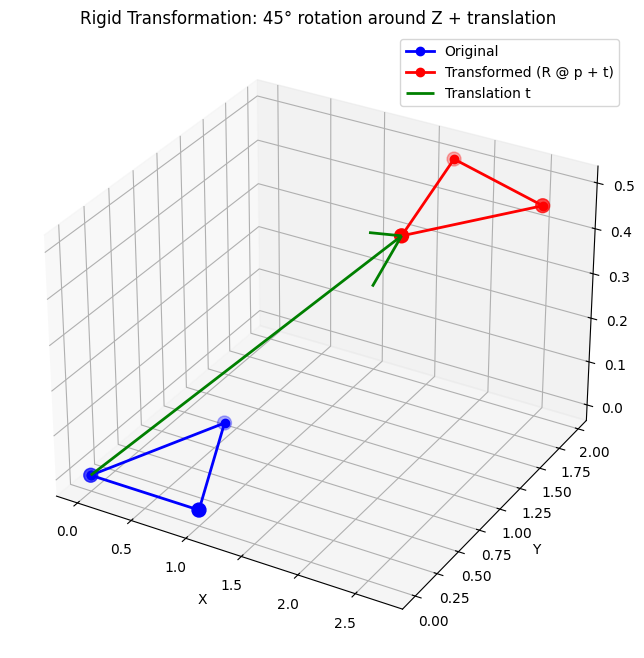

In [111]:
# Visualize the transformation
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot original triangle
ax.plot(triangle[:, 0], triangle[:, 1], triangle[:, 2], 'b-o', linewidth=2, label='Original')
ax.scatter(triangle[:-1, 0], triangle[:-1, 1], triangle[:-1, 2], c='blue', s=100)

# Plot transformed triangle
ax.plot(triangle_transformed[:, 0], triangle_transformed[:, 1], triangle_transformed[:, 2], 
        'r-o', linewidth=2, label='Transformed (R @ p + t)')
ax.scatter(triangle_transformed[:-1, 0], triangle_transformed[:-1, 1], triangle_transformed[:-1, 2], 
           c='red', s=100)

# Draw translation vector from origin
ax.quiver(0, 0, 0, t_transform[0], t_transform[1], t_transform[2], 
          color='green', arrow_length_ratio=0.1, linewidth=2, label='Translation t')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_title('Rigid Transformation: 45° rotation around Z + translation')
plt.show()

# 7 Exercises

## Exercise 1: Array Manipulation

Create a 4×4 matrix `M` containing the integers 1 through 16, then perform the following operations:

1. Extract the **second row** (index 1) and store it in a variable `row2`
2. Extract the **third column** (index 2) and store it in a variable `col3`
3. Extract the **2×2 submatrix** from the bottom-right corner (rows 2–3, columns 2–3) and store it in `submatrix`
4. Compute the **sum of all elements** in the matrix using `np.sum()`
5. Find the **maximum value** in each row using `np.max()` with the `axis` parameter

In [112]:
# Exercise 1: Solution
# ================================

# Step 1: Create the 4x4 matrix M with values 1 to 16
M = np.arange(1, 17).reshape(4, 4)

# Step 2: Extract the second row (index 1)
row2 = M[1, :]

# Step 3: Extract the third column (index 2)
col3 = M[:, 2]

# Step 4: Extract the 2x2 bottom-right submatrix
submatrix = M[2:4, 2:4]

# Step 5: Compute the sum of all elements
total_sum = np.sum(M)

# Step 6: Find the maximum value in each row
row_maxes = np.max(M, axis=1)

# Print results
print("M =\n", M)
print("\nrow2 =", row2)
print("col3 =", col3)
print("\nsubmatrix =\n", submatrix)
print("\nSum of all elements =", total_sum)
print("Max of each row =", row_maxes)

M =
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

row2 = [5 6 7 8]
col3 = [ 3  7 11 15]

submatrix =
 [[11 12]
 [15 16]]

Sum of all elements = 136
Max of each row = [ 4  8 12 16]


---

## Exercise 2: 2D Rotation Practice

A point $P = (3, 1)$ lies in the 2D plane. Perform the following rotations and answer the questions:

1. Rotate point $P$ by **90° counterclockwise** around the origin.
2. Rotate point $P$ by **45° counterclockwise** around the origin.
3. Verify that the distance from the origin is preserved after rotation (i.e., $\|P\| = \|P'\|$)
4. **Bonus**: Rotate $P$ first by 30°, then by another 60°. Verify this gives the same result as rotating by 90° in one step.

**Hint**: Use the `rot2(theta)` function defined earlier, and remember that `np.deg2rad()` converts degrees to radians.

In [113]:
# Exercise 2: Solution
# ================================

# Define point P
P = np.array([3.0, 1.0])
print("Original point P =", P)

# Step 1: Rotate P by 90° counterclockwise
R_90 = rot2(np.deg2rad(90))
P_90 = R_90 @ P
print("\nP rotated 90°:", P_90)

# Step 2: Rotate P by 45° counterclockwise
R_45 = rot2(np.deg2rad(45))
P_45 = R_45 @ P
print("P rotated 45°:", P_45)

# Step 3: Verify distance preservation
original_distance = np.linalg.norm(P)
rotated_distance_90 = np.linalg.norm(P_90)
rotated_distance_45 = np.linalg.norm(P_45)
print("\nOriginal distance from origin:", original_distance)
print("Distance after 90° rotation:", rotated_distance_90)
print("Distance after 45° rotation:", rotated_distance_45)
print("Distance preserved (90°)?", np.isclose(original_distance, rotated_distance_90))
print("Distance preserved (45°)?", np.isclose(original_distance, rotated_distance_45))

# Step 4 (Bonus): Verify R(60°) @ R(30°) @ P == R(90°) @ P
# Note: Apply R(30°) first, then R(60°), so R_composed = R_60 @ R_30
R_30 = rot2(np.deg2rad(30))
R_60 = rot2(np.deg2rad(60))
P_composed = R_60 @ R_30 @ P
print("\n30° then 60° (composed):", P_composed)
print("Direct 90° rotation:", P_90)
print("Are they equal?", np.allclose(P_composed, P_90))

Original point P = [3. 1.]

P rotated 90°: [-1.  3.]
P rotated 45°: [1.4142 2.8284]

Original distance from origin: 3.1622776601683795
Distance after 90° rotation: 3.1622776601683795
Distance after 45° rotation: 3.1622776601683795
Distance preserved (90°)? True
Distance preserved (45°)? True

30° then 60° (composed): [-1.  3.]
Direct 90° rotation: [-1.  3.]
Are they equal? True


# 8 Summary

## Key Concepts Covered

### NumPy Fundamentals
| Concept | Key Functions | Why It Matters |
|---------|---------------|----------------|
| Array creation | `np.array()`, `np.zeros()`, `np.ones()`, `np.eye()` | Building vectors and matrices |
| Shape inspection | `.shape`, `.ndim`, `.size`, `.dtype` | Debugging and ensuring compatibility |
| Indexing/slicing | `A[i, j]`, `A[i:j, :]`, `A[:, k]` | Extracting submatrices and elements |
| Reshaping | `.reshape()`, `np.vstack()`, `np.hstack()` | Converting between representations |

### Linear Algebra for Robotics
| Operation | NumPy Syntax | Robotics Application |
|-----------|--------------|----------------------|
| Dot product | `np.dot(a, b)` or `a @ b` | Projections, angle calculations |
| Norm | `np.linalg.norm(v)` | Distance, normalizing directions |
| Cross product | `np.cross(a, b)` | Torque, perpendicular vectors |
| Matrix multiply | `A @ B` | Applying transformations |
| Transpose | `A.T` | Inverting rotations |
| Determinant | `np.linalg.det(A)` | Validating rotation matrices |
| Inverse | `np.linalg.inv(A)` | Reversing transformations |

### Transformations
| Transformation | Formula | Properties |
|----------------|---------|------------|
| 2D Rotation | $R_{2D}(\theta) \cdot \mathbf{p}$ | Preserves distances, `det(R) = 1` |
| 3D Rotation | $R_x$, $R_y$, $R_z$ | Orthonormal, order-dependent |
| Rigid transform | $R \cdot \mathbf{p} + \mathbf{t}$ | Rotation + translation |

## Common Pitfalls to Avoid

⚠️ **Using `*` instead of `@`** for matrix multiplication — `*` is elementwise!

⚠️ **Forgetting rotation order matters** — $R_z \cdot R_y \neq R_y \cdot R_z$

⚠️ **Modifying views unintentionally** — slices are views, use `.copy()` when needed

⚠️ **Degrees vs radians** — NumPy trig functions use radians; use `np.deg2rad()` and `np.rad2deg()`

## Additional Resources
- [Numpy documentation](https://numpy.org/doc/1.26/)
- [Numpy tutorials](https://numpy.org/learn/)
- [More on array broadcasting](https://www.geeksforgeeks.org/numpy/numpy-array-broadcasting/)